In [1]:
import os
from crnn import CRNN
import torch
import torch.nn.functional as F
import torchvision
import dataset
from torch.autograd import Variable
import utils
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nh = 100
alphabet = '0123456789'
nclass = len(alphabet) + 1
nc = 1
mynet = CRNN(32, nc, nclass, nh)

In [3]:
converter = utils.strLabelConverter(alphabet)

In [4]:
mynet.load_state_dict(torch.load('/home/sherlock/Documents/express_recognition/data/model_save/telephone/baseline.pth'))
mynet = mynet.cuda()
mynet = mynet.eval()

In [5]:
root = '/home/sherlock/Documents/express_recognition/data/validation/'
img_root = root + 'telephone'
txt_root = root + 'val_label.txt'

In [6]:
dset = dataset.Dataset(img_root=img_root, txt_root=txt_root)

In [7]:
print('All Valid Image number is {}'.format(len(dset)))

All Valid Image number is 351


In [8]:
def get_acc():
    transformer = dataset.resizeNormalize((256, 32))
    num_correct = 0
    for i, img_path in enumerate(dset.image):
        image = Image.open(img_path).convert('L')
        image = transformer(image).cuda()
        image = image.view(1, *image.size())
        image = Variable(image)

        preds = mynet(image) # sequence_length x batch_size x n_classes
        _, preds = preds.max(2) # sequence_length x batch_size x 1
        preds = preds.view(-1) # sequence_length x 1
        preds_size = torch.IntTensor([preds.size(0)])
        raw_pred = converter.decode(preds.data, preds_size, raw=True)
        sim_pred = converter.decode(preds.data, preds_size, raw=False)
        if sim_pred == dset.label[i]:
            num_correct += 1
        else:
            pic = Image.open(img_path)
            plt.imshow(pic)
            plt.show()
            print('{} => {}'.format(raw_pred, sim_pred))
    print('total accuracy: {:.6f}'.format(num_correct/len(dset)))

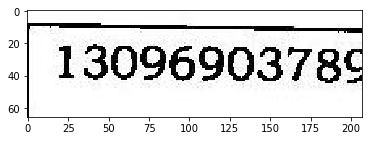

1111--3-00-99-6--9-00-33-77-8--6 => 13096903786


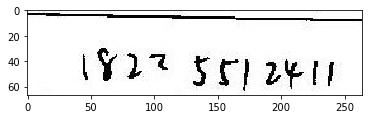

11----88-22-7--55-551-22-41111-- => 1827551241


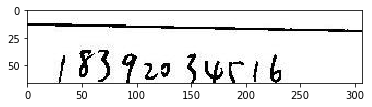

111-88-3-9-22--3-4--11-6-------- => 183923416


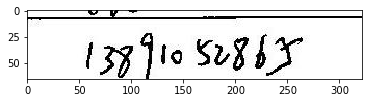

11----33889911--5-28886-5------- => 1389152865


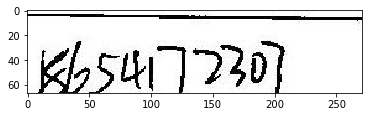

18--6-55-44---7--2-3-0077------- => 1865472307


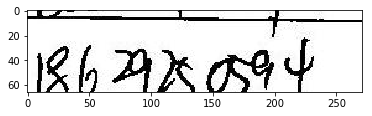

1-8--6--229928-5---5599---4----- => 18629285594


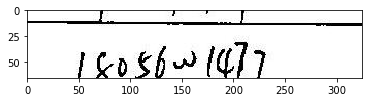

11----5--0566000-1477-7--------- => 1505601477


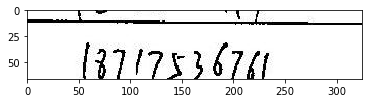

11----8-7117755336677-1--------- => 1871753671


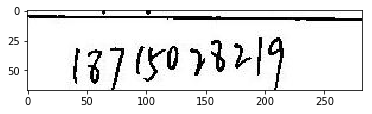

11---88-7115-0-223322119-------- => 18715023219


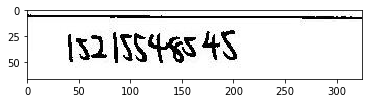

11--5-21155-448-4455------------ => 152154845


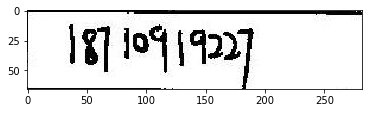

11---8-71189911-9-227----------- => 1871891927


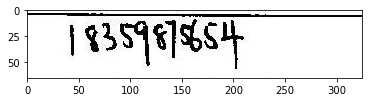

11---82-559-998866-4------------ => 182599864


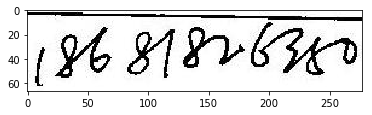

11-8--6--88-77-8--2--66-38-5--0- => 186878263850


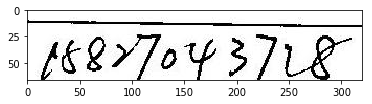

11-5-88-2-77-00-4--33-7-22-88--- => 15827043728


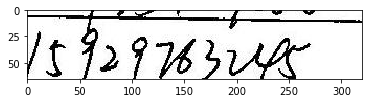

115--9-2--9-7766-3-2--4-8------- => 15929763248


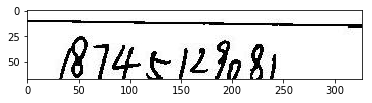

111-8-7744-551132-9--8-11------- => 18745132981


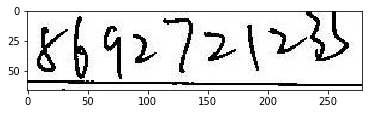

-8--6--99-22--7--22-11-22--3-5-- => 8692721235


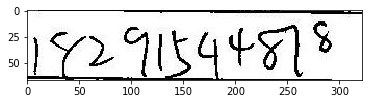

115---2--991155--1-44-8--7-88--- => 15291514878


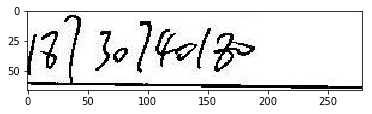

18--7-330-7744-11-8-00---------- => 1873074180


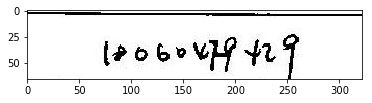

11------8-0--00-449944--99------ => 18004949


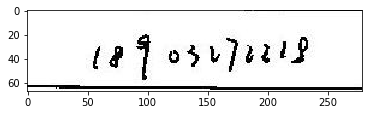

11------8-99-0-322777121188----- => 18903271218


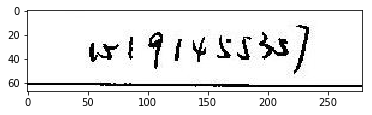

11-----5-1-9911-4-5-5-33-77----- => 1519145537


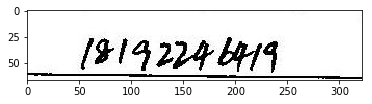

11----88119-222-4----1-9-------- => 18192419


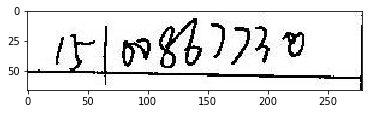

111-5-11-00-88-6-7--7-3-00------ => 1510867730


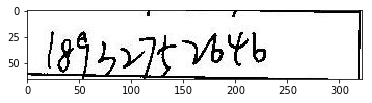

1188-922-22755-2-664466--------- => 18922752646


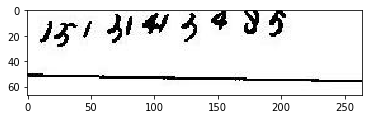

11-5-1---------3----8----------- => 15138


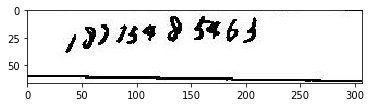

11---3-724-0-8--5-66-5---------- => 1372408565


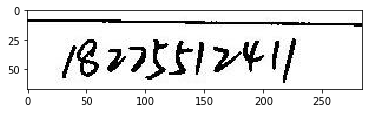

1111-8-22-755-511-2-441111------ => 1827551241


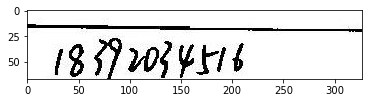

11188-3992209-44-5166----------- => 18392094516


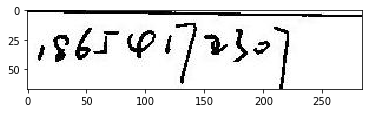

118--6-5--4-1177-4-33-0-7------- => 18654174307


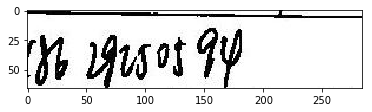

188--229906-051-99-4------------ => 18290605194


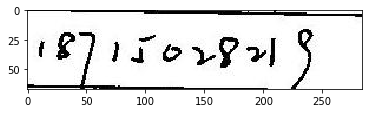

1188-7-11-5--0-22-8--2-1--8----- => 18715028218


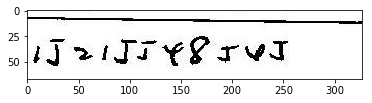

115-22115557-4-88-5--4-55------- => 15215748545


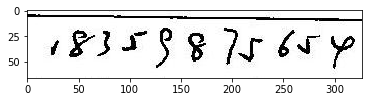

111-8--3-55-3--88-7755-66-5--4-- => 18353875654


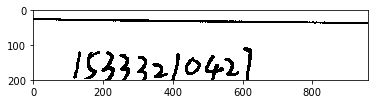

11--55-333322-0044277----------- => 15320427


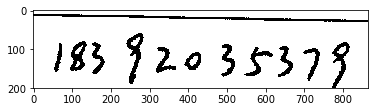

1118833-99-22-00-33-55-33-7-88-- => 18392035378


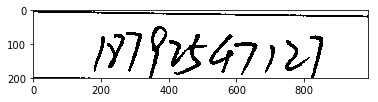

11------77-92255-4--7-1-2-77---- => 1792547127


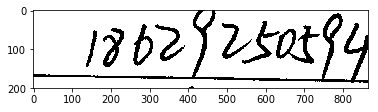

11----88-66-22-99-2--5-005599--- => 1862925059


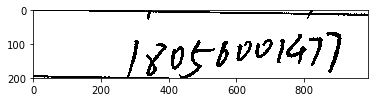

11--------88-0-554-000014-7-77-- => 1805401477


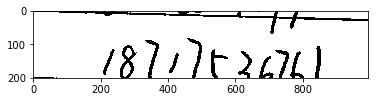

11------8-77-177-5-22-5-7-11---- => 1871752571


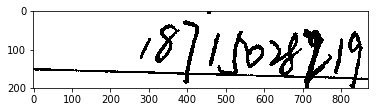

11---------88-77111100-2899-1199 => 1871028919


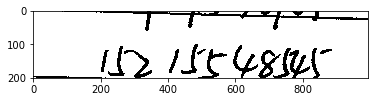

11-----55-2-115-55-4488-4-55---- => 1521554845


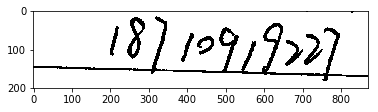

11-------8-7711---911-9-222-7--- => 187191927


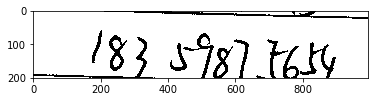

11-----8-33--5-998877-7-6554---- => 18359877654


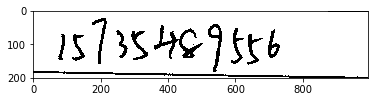

11155773355-9-2-99555-6--------- => 1573592956


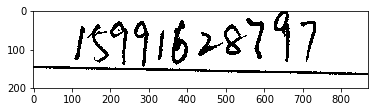

11---559999118-22-8-77-9-77----- => 1591828797


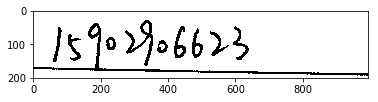

1115-9902290066622-3------------ => 1590290623


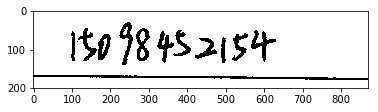

111-5-49988445--2115-44--------- => 15498452154


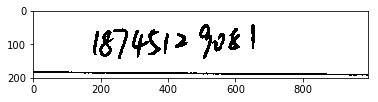

11----8-7445122-9-8811---------- => 1874512981


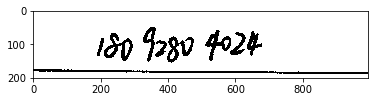

11----88009988004-2224---------- => 180980424


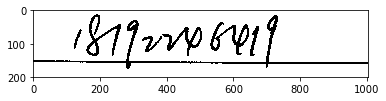

11---8-79922224466-44-9--------- => 187924649


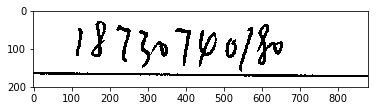

11---88-7-3-277-4-0718-00------- => 187327407180


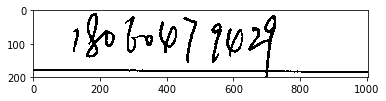

11--888066-44-7-99-0229--------- => 1806479029


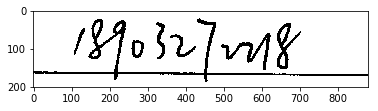

11---8-990033227770-2718-------- => 189032702718


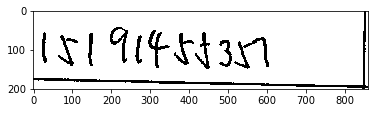

115511-99114-5555-3-5-1--------- => 1519145351


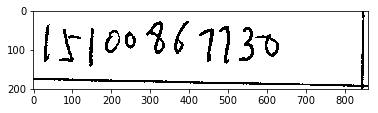

115511--00-8-66-77733-00-------- => 151086730


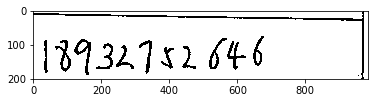

113-993327775-226-44-6---------- => 13932752646


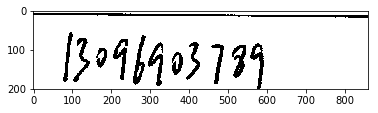

11133-099669903377-3-9---------- => 13096903739


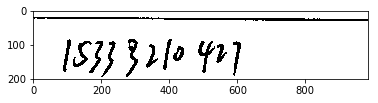

11155-3333-216-44--7------------ => 15321647


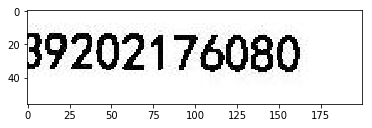

8-9-22-0-2211-77-6-0088-00------ => 89202176080


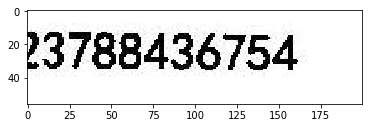

--3-7788-8-44-3-66-7-55-4------- => 3788436754
total accuracy: 0.826211


In [9]:
get_acc()

In [ ]:
def show_result(img_name):
    root = '/home/sherlock/Documents/express_recognition/data/validation/telephone'
    img_path = os.path.join(root, img_name)
    transformer = dataset.resizeNormalize((256, 32))
    image = Image.open(img_path).convert('L')
    image = transformer(image).cuda()
    image = image.view(1, *image.size())
    image = Variable(image)
    
    mynet.eval()
    preds = mynet(image) # sequence_length x batch_size x n_classes
    _, preds = preds.max(2) # sequence_length x batch_size x 1
    preds = preds.view(-1) # sequence_length x 1
    preds_size = torch.IntTensor([preds.size(0)])
    raw_pred = converter.decode(preds.data, preds_size, raw=True)
    sim_pred = converter.decode(preds.data, preds_size, raw=False)
    pic = Image.open(img_path)
    plt.imshow(pic)
    plt.show()
    print('{} => {}'.format(raw_pred, sim_pred))

In [ ]:
show_result('1_15_9.jpg')

In [ ]:
root = '/home/sherlock/Documents/express_recognition/data/validation/telephone'
img_path = os.path.join(root, '17_210_1_1.png')
transformer = dataset.resizeNormalize((128, 32))
image = Image.open(img_path).convert('L')
image = transformer(image).cuda()
image = image.view(1, *image.size())
image = Variable(image)

mynet.eval()
preds = mynet(image) # preds sequence_length x batch_size x n_classes

In [ ]:
preds = preds.squeeze(1)

In [ ]:
preds = F.softmax(preds)
prob, label = torch.max(preds, 1)

In [ ]:
tele = ''
for i in range(label.size(0)):
    if prob[i].cpu().data[0] > 0.9:
        if label[i].cpu().data[0] == 0:
            tele += '-'
        else:
            tele += str(label[i].cpu().data[0]-1)

In [ ]:
for i in range(preds.size(0)):
    label = preds.cpu().data[i, :]
    label = label.numpy()
    plt.plot(label)
    plt.title('{}'.format(i))
    plt.show()

In [ ]:
all_file_name = os.listdir('/home/sherlock/Documents/express_recognition/data/validation/telephone/')

for img in all_file_name:
    show_result(img)
    print()